In [1]:
#r "nuget:Microsoft.Data.Analysis,0.21.0"

Installed Packages Microsoft.Data.Analysis, 0.21.0

Loading extensions from `C:\Users\jongho\.nuget\packages\microsoft.data.analysis\0.21.0\interactive-extensions\dotnet\Microsoft.Data.Analysis.Interactive.dll`

In [2]:
using Microsoft.Data.Analysis;

In [4]:
using System.IO;
using System.Linq;

// Define data path
var dataPath = Path.GetFullPath(@"prices.csv");

// Load the data into the data frame
var dataFrame = DataFrame.LoadCsv(dataPath);

In [5]:
dataFrame

index,Id,Size,HistoricalPrice,CurrentPrice
0,1,600f,100000,170000
1,2,1000f,200000,225000
2,3,1000f,126000,195000
3,4,850f,150000,205000
4,5,900f,155000,210000
5,6,550f,99000,180000


In [6]:
dataFrame.Description()

index,Description,Id,HistoricalPrice,CurrentPrice
0,Length (excluding null values),6,6,6
1,Max,6,200000,225000
2,Min,1,99000,170000
3,Mean,3.5,138333.33,197500


In [7]:
dataFrame.Info()

index,Info,Id,Size,HistoricalPrice,CurrentPrice
0,DataType,System.Single,System.String,System.Single,System.Single
1,Length (excluding null values),6,6,6,6


In [8]:
#r "nuget:ScottPlot, 5.0.36"

Installed Packages ScottPlot, 5.0.36

Loading extensions from `C:\Users\jongho\.nuget\packages\skiasharp\2.88.8\interactive-extensions\dotnet\SkiaSharp.DotNet.Interactive.dll`

In [9]:
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetImageHtml(400, 300)), HtmlFormatter.MimeType);

In [10]:
using ScottPlot;
using Microsoft.Data.Analysis;
using System;
using System.Linq;

In [20]:
ScottPlot.RandomDataGenerator generator = new ScottPlot.RandomDataGenerator();
double[] tempData = generator.RandomWalk(10);
double[] humidData = generator.RandomWalk(10);
// double[] tempData = Generate.Random(10, 100);
// double[] humidData = Generate.Random(10, 100);

Array.Sort(tempData);
Array.Sort(humidData);

DoubleDataFrameColumn colTemp = new DoubleDataFrameColumn("Temperature", tempData);
DoubleDataFrameColumn colHumid = new DoubleDataFrameColumn("Humidity", humidData);
DataFrameColumn[] columns = { colTemp, colHumid };
DataFrame df = new DataFrame(columns);

// extract data into double arrays
// double[] xs = Enumerable.Range(0, (int)df.Rows.Count).Select(row => Convert.ToDouble(df["Temperature"][row])).ToArray();
// double[] ys = Enumerable.Range(0, (int)df.Rows.Count).Select(row => Convert.ToDouble(df["Humidity"][row])).ToArray();
double[] xs = df["Temperature"].Cast<double>().ToArray();
double[] ys = df["Humidity"].Cast<double>().ToArray();

double[] dataX = { 1, 2, 3, 4, 5 };
double[] dataY = { 1, 4, 9, 16, 25 };

ScottPlot.Plot myPlot = new();
myPlot.Add.Scatter(xs, ys);

// myPlot.SavePng("quickstart.png", 400, 300); // 이미지로 저장
df

index,Temperature,Humidity
0,-1.6834001590886154,-1.0917413337583382
1,-1.1498177787986668,-0.10283957985362013
2,-0.8363726720383262,0
3,-0.6210203327336443,0.050140640256060465
4,-0.32462542798585514,0.3956887407208274
5,-0.27411834815243186,0.40167617164630254
6,-0.04333373440584798,0.42405572693052496
7,0,0.4425301353645186
8,0.0797271640411239,0.6524557451030498
9,0.1400443441886663,0.9220629683332809



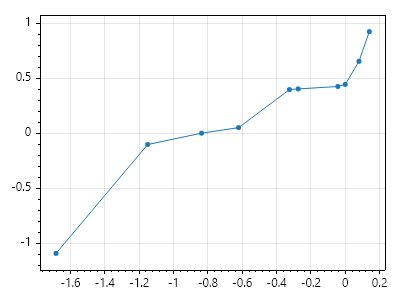

In [21]:
myPlot


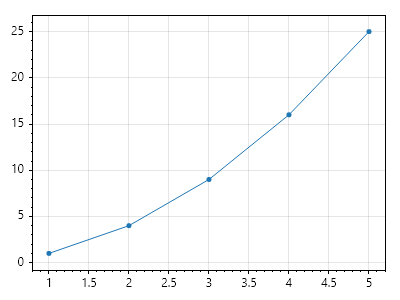

In [23]:
ScottPlot.Plot myPlot1 = new();
myPlot1.Add.Scatter(dataX, dataY);
myPlot1